In [10]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [11]:
# TensorFlow 버전 출력
print("TensorFlow Version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
#  tensorflow 2.10.0와 호환되는 버전
# cuDNN : 8.1  
# CUDA : 11.2

TensorFlow Version: 2.10.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
# 데이터 불러오기 
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
print(train_dataset.shape, test_dataset.shape)

(10886, 12) (6493, 9)


In [13]:
# datetime 컬럼을 datetime 타입으로 변환
train_dataset['datetime'] = pd.to_datetime(train_dataset['datetime'])
test_dataset['datetime'] = pd.to_datetime(test_dataset['datetime'])

# datetime에서 유용한 특성 추출
train_dataset['year'] = train_dataset['datetime'].dt.year
train_dataset['month'] = train_dataset['datetime'].dt.month
train_dataset['day'] = train_dataset['datetime'].dt.day
train_dataset['hour'] = train_dataset['datetime'].dt.hour
train_dataset['dayofweek'] = train_dataset['datetime'].dt.dayofweek

test_dataset['year'] = test_dataset['datetime'].dt.year
test_dataset['month'] = test_dataset['datetime'].dt.month
test_dataset['day'] = test_dataset['datetime'].dt.day
test_dataset['hour'] = test_dataset['datetime'].dt.hour
test_dataset['dayofweek'] = test_dataset['datetime'].dt.dayofweek

In [14]:
train_dataset.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)

test_datetime = test_dataset['datetime'].copy()
test_dataset.drop(['datetime'], axis=1, inplace=True)
print(test_datetime.shape)
print(train_dataset.columns)
print(test_dataset.columns)

(6493,)
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour',
       'dayofweek'],
      dtype='object')
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')


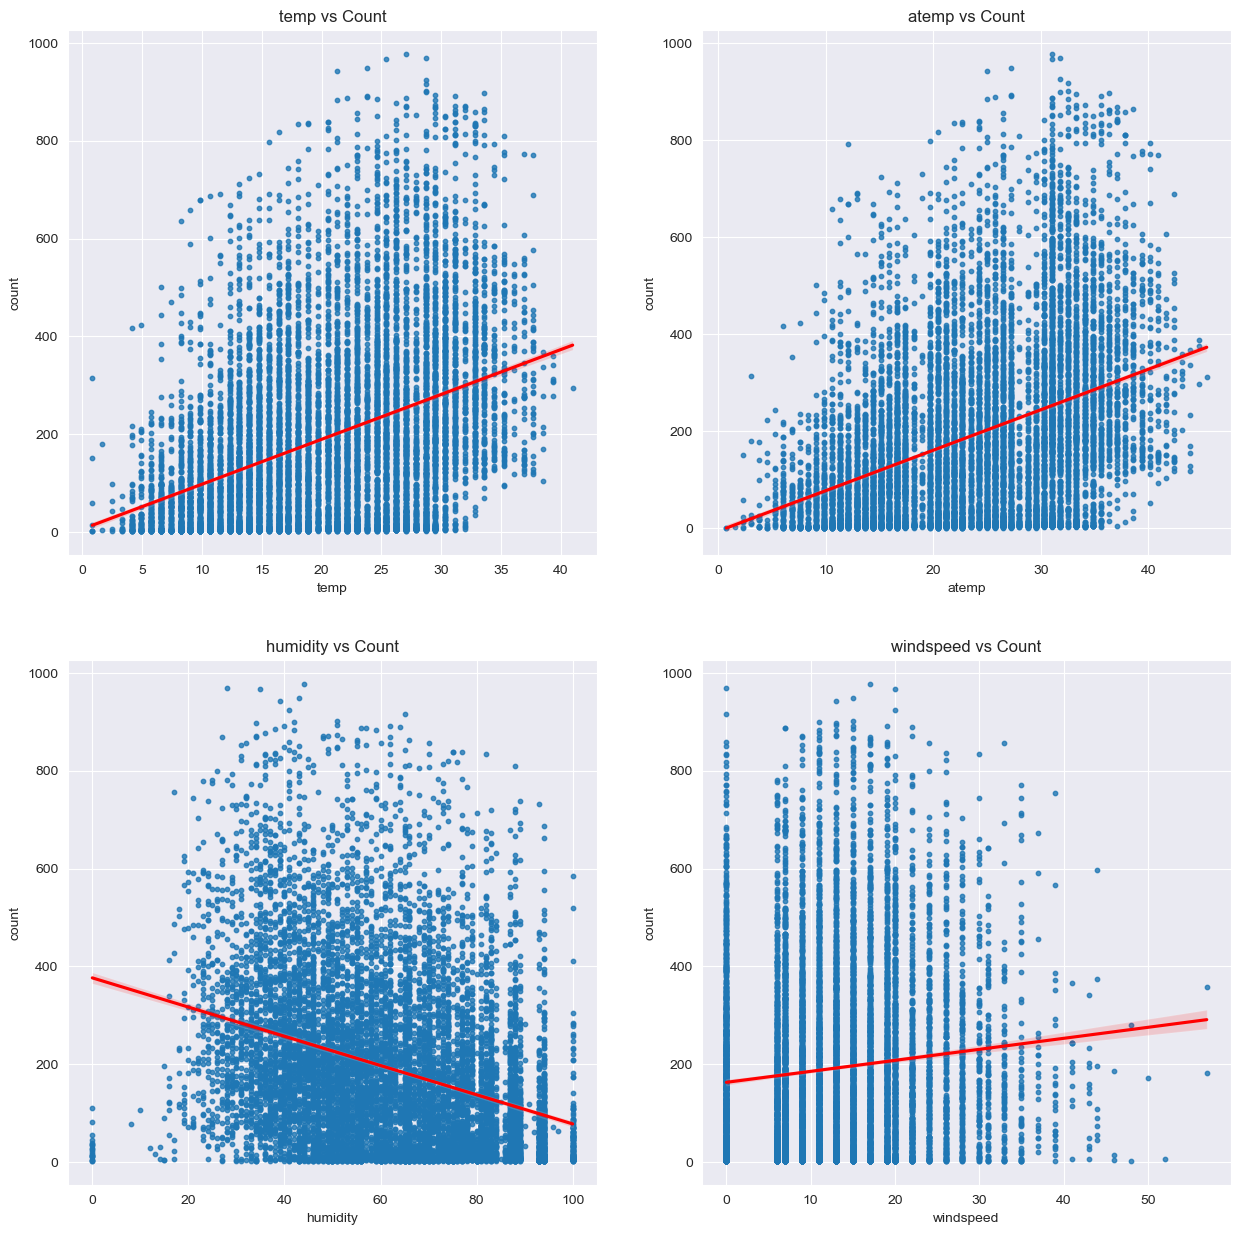

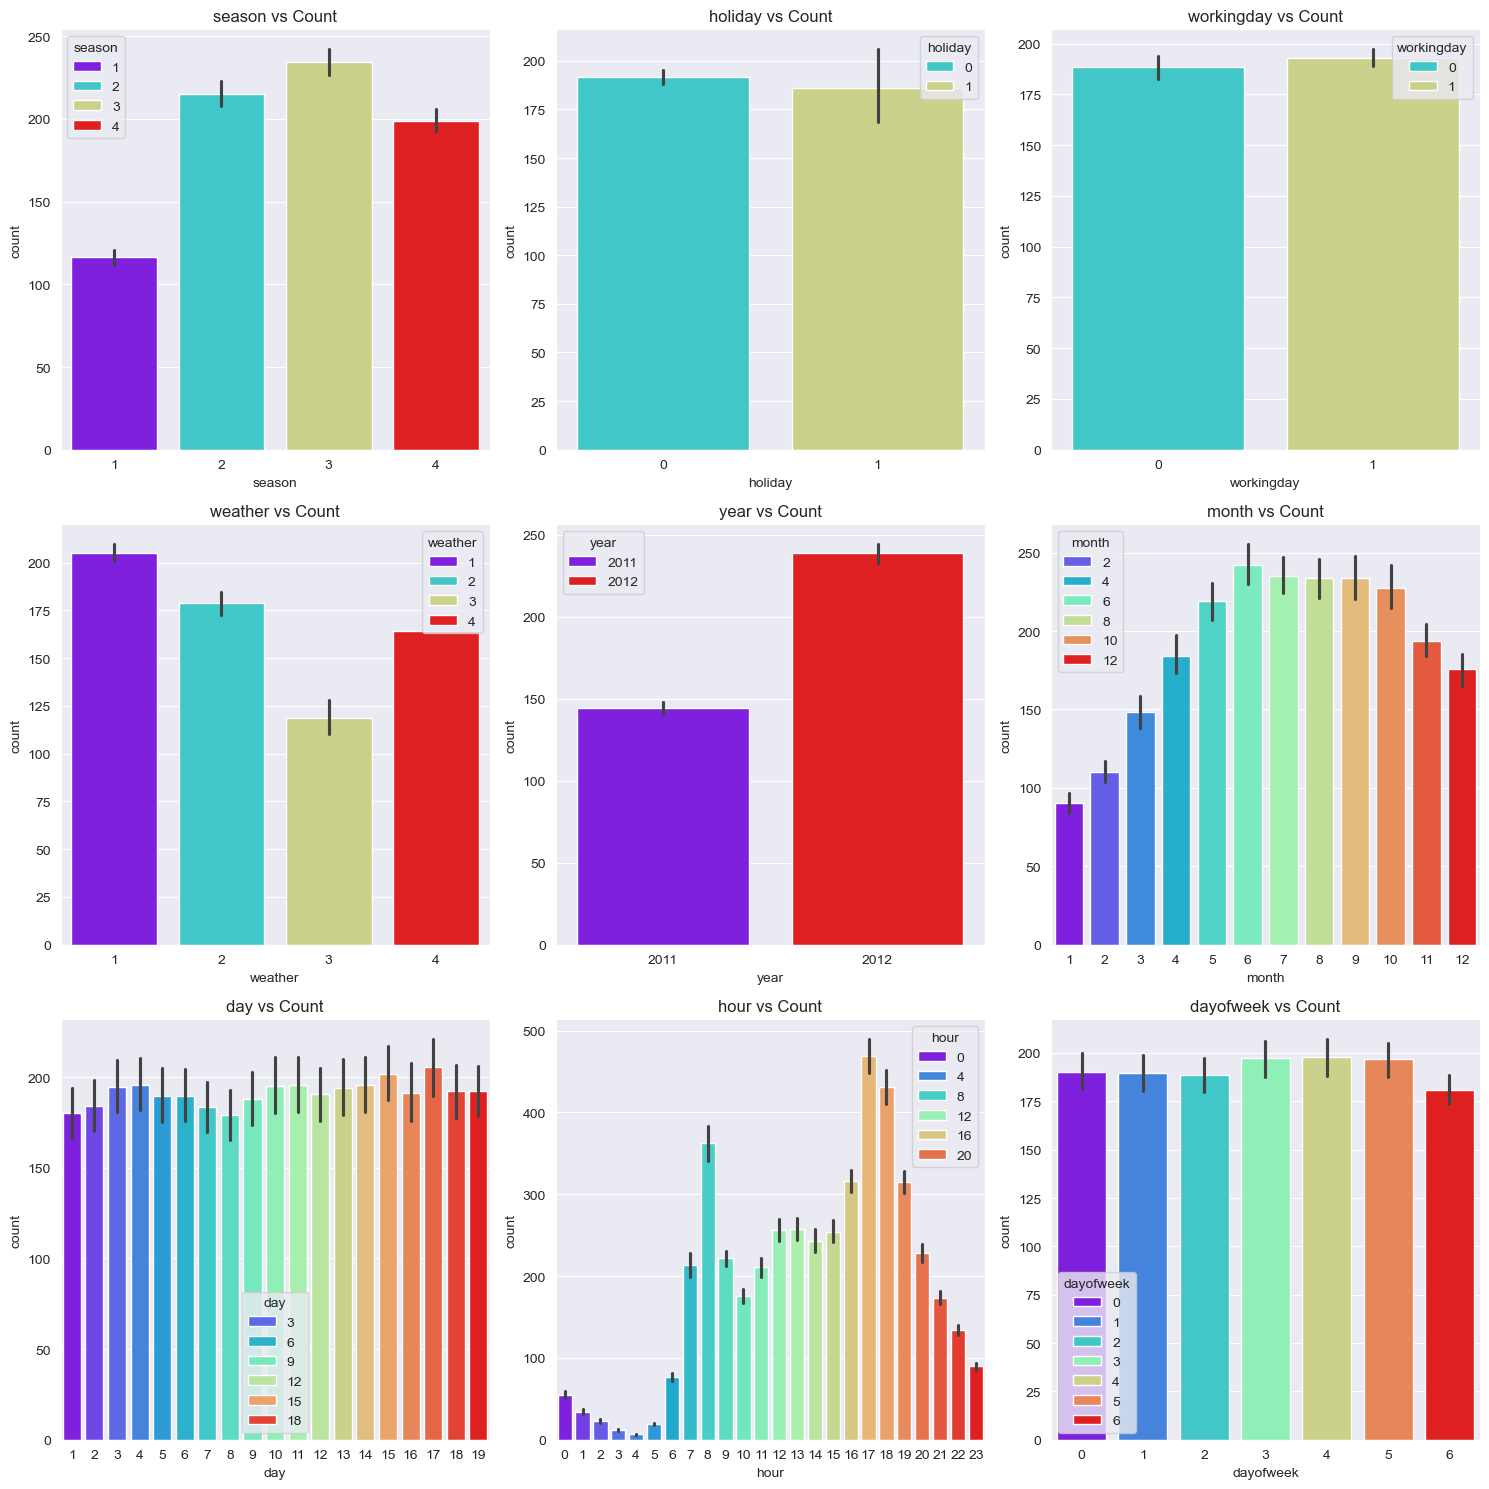

In [15]:
# 다른 모든 column과 count 간의 관계를 시각화해서 살펴보자
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed']
categorical_cols = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour', 'dayofweek']

plt.figure(figsize=(15, 15))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=col, y='count', data=train_dataset, scatter_kws={'s': 10}, line_kws={"color": "red"})
    plt.title(f'{col} vs Count')
    
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=col, y='count', hue=col, data=train_dataset, palette='rainbow')
    plt.title(f'{col} vs Count')

plt.tight_layout()
plt.show()

In [17]:
# workingday, day, dayofweek : 별차이없음
# year: 2년치가 데이터가 너무 적음
# temp와 atemp는 거의 유사 둘중 하나만 사용

train_dataset.drop(['atemp','workingday','day','dayofweek','year'], axis=1, inplace=True)
test_dataset.drop(['atemp','workingday','day','dayofweek','year'], axis=1, inplace=True)
print(train_dataset.columns, test_dataset.columns)

KeyError: "['atemp', 'workingday', 'day', 'dayofweek', 'year'] not found in axis"

In [19]:
print(train_dataset.shape)
print(test_dataset.shape)

(10886, 9)
(6493, 8)


In [21]:
train_dataset.tail()
test_dataset.tail()

,season,holiday,weather,temp,humidity,windspeed,month,hour
6488,1,0,2,10.66,60,11.0014,12,19
6489,1,0,2,10.66,60,11.0014,12,20
6490,1,0,1,10.66,60,11.0014,12,21
6491,1,0,1,10.66,56,8.9981,12,22
6492,1,0,1,10.66,65,8.9981,12,23


In [24]:
# 범주형데이터
categorical_cols = ['season', 'holiday', 'weather', 'month', 'hour']
train_dataset[categorical_cols] = train_dataset[categorical_cols].astype('category')
test_dataset[categorical_cols] = test_dataset[categorical_cols].astype('category')
print(train_dataset.info(), test_dataset.info())

train_dataset = pd.get_dummies(train_dataset, drop_first=True, dtype=float)
test_dataset = pd.get_dummies(test_dataset, drop_first=True, dtype=float)

print(train_dataset.info(), test_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   season     10886 non-null  category
 1   holiday    10886 non-null  category
 2   weather    10886 non-null  category
 3   temp       10886 non-null  float64 
 4   humidity   10886 non-null  int64   
 5   windspeed  10886 non-null  float64 
 6   count      10886 non-null  int64   
 7   month      10886 non-null  category
 8   hour       10886 non-null  category
dtypes: category(5), float64(2), int64(2)
memory usage: 394.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   season     6493 non-null   category
 1   holiday    6493 non-null   category
 2   weather    6493 non-null   category
 3   temp       6493 non-null   float64 
 4   humidity   6493 non

In [25]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# 수치형 데이터
numerical_cols = ['temp', 'humidity', 'windspeed']
scaler = MinMaxScaler()
train_dataset[numerical_cols] = scaler.fit_transform(train_dataset[numerical_cols])
test_dataset[numerical_cols] = scaler.transform(test_dataset[numerical_cols])

In [27]:
print(train_dataset.tail())
print(train_dataset.shape)
print(test_dataset.shape)

           temp  humidity  windspeed  count  season_2  season_3  season_4  \
10881  0.367347      0.50   0.456213    336       0.0       0.0       1.0   
10882  0.346939      0.57   0.263195    241       0.0       0.0       1.0   
10883  0.326531      0.61   0.263195    168       0.0       0.0       1.0   
10884  0.326531      0.61   0.105325    129       0.0       0.0       1.0   
10885  0.306122      0.66   0.157870     88       0.0       0.0       1.0   

       holiday_1  weather_2  weather_3  ...  hour_14  hour_15  hour_16  \
10881        0.0        0.0        0.0  ...      0.0      0.0      0.0   
10882        0.0        0.0        0.0  ...      0.0      0.0      0.0   
10883        0.0        0.0        0.0  ...      0.0      0.0      0.0   
10884        0.0        0.0        0.0  ...      0.0      0.0      0.0   
10885        0.0        0.0        0.0  ...      0.0      0.0      0.0   

       hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  hour_23  
10881      0.0      0

In [16]:
# # 시계열 데이터형태로 만들기 위해 sliding window 함수 생성
# import numpy as np
# 
# def sliding_window(dataset, timestep=5, is_train=True):
#     x = []
#     y = []
#     for i in range(timestep, len(dataset)):
#         if is_train:
#             x.append(dataset.iloc[(i-timestep):i].drop('count', axis=1).values)
#             y.append(dataset.iloc[i]['count'])
#         else:
#             x.append(dataset.iloc[(i-timestep):i].values)
#     return np.array(x), np.array(y) if is_train else np.array(x)

### 모델 구성

In [101]:
import tensorflow as tf
from tensorflow.keras import layers, metrics, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras_tuner import HyperModel, RandomSearch, Objective
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K

In [60]:
from tensorflow.keras import backend as K
# RMSE 정의
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))

In [61]:
# 서브클래싱 방식 모델 정의
class BikeModel(Model):
    def __init__(self, input_dim, hidden_units=[64, 32], dropout_rate=0.2):
        super(BikeModel, self).__init__()
        self.hidden_layers = [
            layers.Dense(units, activation='relu') for units in hidden_units
        ]
        self.dropout = layers.Dropout(dropout_rate)
        self.output_layer = tf.keras.layers.Dense(1, activation='linear') 

    def call(self, inputs, training=False):
        x = inputs
        for layer in self.hidden_layers:
            x = layer(x)
            if training:
                x = self.dropout(x, training=training)
        outputs = self.output_layer(x)           
        return outputs

In [62]:
X = train_dataset.drop(columns=['count']).values 
y = train_dataset['count'].values

# count column 정규화
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(np.log1p(y).reshape(-1, 1))

input_dim = X.shape[1]
print(X.shape, y.shape, input_dim)

(10886, 44) (10886, 1) 44


In [140]:
epochs = 1000
batch_size = 32
learning_rate = 0.001
hidden_units = [64, 32, 16]
dropout_rate = 0.2

In [141]:
model = BikeModel(input_dim, hidden_units)
model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=[root_mean_squared_error, 'mae'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

early_stopping = EarlyStopping(patience=10, monitor='val_root_mean_squared_error',restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.5, patience=3,min_lr=0.001)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=epochs, batch_size=batch_size,callbacks=[early_stopping, reduce_lr])

Epoch 1/1000
273/273 [==============================] - 1s 3ms/step - loss: 0.0821 - root_mean_squared_error: 0.2729 - mae: 0.2238 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1484 - val_mae: 0.1253 - lr: 0.0010
Epoch 2/1000
273/273 [==============================] - 1s 2ms/step - loss: 0.0342 - root_mean_squared_error: 0.1833 - mae: 0.1484 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1290 - val_mae: 0.1066 - lr: 0.0010
Epoch 3/1000
273/273 [==============================] - 1s 2ms/step - loss: 0.0259 - root_mean_squared_error: 0.1597 - mae: 0.1280 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1203 - val_mae: 0.0980 - lr: 0.0010
Epoch 4/1000
273/273 [==============================] - 1s 2ms/step - loss: 0.0221 - root_mean_squared_error: 0.1474 - mae: 0.1188 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1121 - val_mae: 0.0895 - lr: 0.0010
Epoch 5/1000
273/273 [==============================] - 1s 2ms/step - loss: 0.0195 - root_mean_squared_error: 0.1381 - mae: 

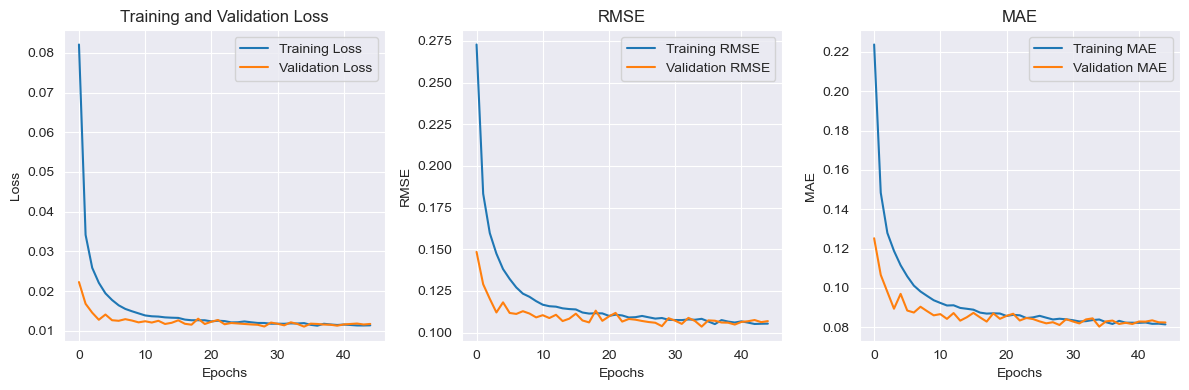

In [142]:
import matplotlib.pyplot as plt

# 학습 이력 그래프 그리기
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    # RMSE
    plt.subplot(1, 3, 2)
    plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
    plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.title('RMSE')
    plt.legend()
    
    # MAE
    plt.subplot(1, 3, 3)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 학습 이력 시각화
plot_history(history)

In [143]:
loss, RMSE, MAE = model.evaluate(X_val, y_val, verbose=0)
print(f"evaluate: {loss}, RMSE: {RMSE}, MAE:{MAE}")

evaluate: 0.01109407190233469, RMSE: 0.10359534621238708, MAE:0.08035507053136826


In [144]:
X_test = test_dataset.values
print(X_test.shape)

(6493, 44)


In [135]:
# 예측
y_pred = model.predict(X_test)  # 전체 데이터에 대한 예측 (입력 데이터 변경 가능)

# 예측값 역변환
y_pred = np.expm1(y_scaler.inverse_transform(y_pred))  # 로그 및 MinMax 역변환

submission = pd.DataFrame({
    'datetime': test_datetime,  # 테스트 데이터의 datetime 컬럼
    'count': y_pred.flatten()  # 예측값
})
submission.to_csv('submission.csv', index=False)

print('Submission file has been created.')

203/203 [==============================] - 0s 798us/step
Submission file has been created.
